In [223]:
import numpy as np
import pandas as pd
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [224]:
sonar_data = pd.read_csv("/content/drive/MyDrive/Programming/Datasets/sonar_data.csv", header=None)

# Look at the Big Picture

In [225]:
sonar_data

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


In [226]:
sonar_data.iloc[:, 60] = sonar_data.iloc[:, 60].map({"R": 0, "M": 1})
sonar_data

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,0
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,0
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,0
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,0
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,1
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,1
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,1
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,1


In [227]:
sonar_data[60].value_counts()

,count
60,
1,111
0,97


In [228]:
X = sonar_data.drop(columns=60, axis=1)
y = sonar_data[60].astype(int)
y

,60
0,0
1,0
2,0
3,0
4,0
...,...
203,1
204,1
205,1
206,1


# Spit the Test Set

In [229]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    stratify=y,
                                                    random_state=1)

In [230]:
y_train.value_counts()/y_test.value_counts()

,count
60,
1,4.045455
0,3.850000


# Preprocessing

In [231]:
from sklearn.preprocessing import StandardScaler

log_model = make_pipeline(
    StandardScaler(),
    LogisticRegression()
)

# Train the Model

In [232]:
log_model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

# Model Evaluation

In [233]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(log_model, X_train, y_train, cv=3)
y_train_pred

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0])

In [234]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_train_pred)
cm

array([[56, 21],
       [21, 68]])

### Precision and Recall

In [235]:
from sklearn.metrics import precision_score, recall_score

In [236]:
precision_score(y_train, y_train_pred)

0.7640449438202247

In [237]:
recall_score(y_train, y_train_pred)

0.7640449438202247

In [238]:
from sklearn.metrics import f1_score
f1_score(y_train, y_train_pred)

0.7640449438202247

In [239]:
y_scores = cross_val_predict(log_model, X_train, y_train, cv=3,
                             method="predict_proba")[:, 1]
y_scores

array([1.05866843e-02, 2.18713594e-01, 4.52278426e-01, 3.10737998e-02,
       5.11356255e-01, 7.67436206e-01, 9.99543616e-01, 9.99313644e-01,
       9.93162186e-01, 3.35476061e-02, 5.30766239e-01, 9.83251095e-01,
       1.42402686e-01, 5.10804021e-01, 7.10484975e-01, 2.86123102e-01,
       9.57649015e-01, 9.95683219e-01, 9.54224968e-01, 9.99346039e-01,
       2.30405513e-04, 5.24963616e-03, 4.50599329e-02, 6.58865615e-03,
       9.12622114e-01, 1.80221986e-01, 9.88215968e-01, 8.81052742e-01,
       1.92020882e-01, 3.96621144e-01, 6.96468442e-01, 2.63312083e-01,
       7.07831782e-04, 9.37574462e-01, 4.94924682e-01, 9.78169867e-01,
       2.13152956e-01, 9.86549665e-01, 1.90012397e-01, 9.75525216e-01,
       1.52799120e-01, 6.99912074e-01, 4.32768996e-01, 4.06924170e-01,
       6.19468433e-01, 9.99965407e-01, 9.99975520e-01, 6.83746160e-01,
       4.69027561e-02, 9.98423006e-01, 3.97011971e-03, 9.00295586e-01,
       1.08708418e-02, 9.92150142e-01, 9.99925281e-01, 3.98396026e-01,
      

In [240]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

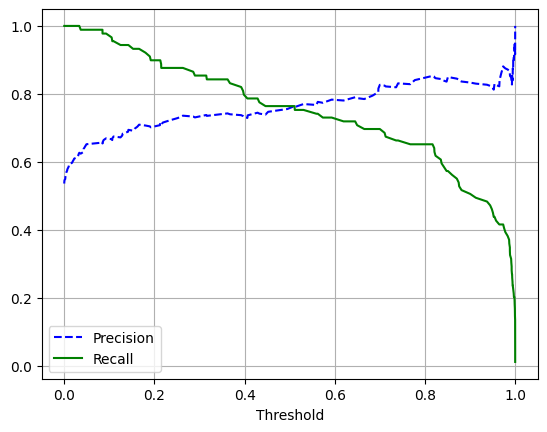

In [241]:
import matplotlib.pyplot as plt

plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plt.xlabel("Threshold")
plt.legend()
plt.grid(True)
plt.show()

### Find the threshold that has the recall of 0.9

In [242]:
target_recall = 0.90

# Find the indices where recall is greater than or equal to the target recall
valid_indices = np.where(recalls >= target_recall)[0]

# Find the index that maximizes precision within the valid indices
best_idx = valid_indices[np.argmax(precisions[valid_indices])]

# Get the best threshold, precision, and recall at that index
best_threshold = thresholds[best_idx]
best_precision = precisions[best_idx]
best_recall = recalls[best_idx]

print("Best threshold:", best_threshold)
print("Precision at that threshold:", best_precision)
print("Recall at that threshold:", best_recall)

Best threshold: 0.1661692912833544
Precision at that threshold: 0.7094017094017094
Recall at that threshold: 0.9325842696629213


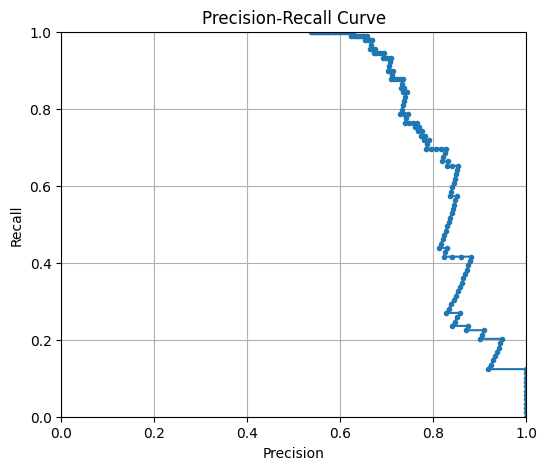

In [243]:
# Plot Precision-Recall curve
plt.figure(figsize=(6, 5))
plt.plot(precisions,recalls, marker='.')
plt.title('Precision-Recall Curve')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.grid(True)
plt.show()

# Use the Model

In [244]:
y_test_scores = log_model.predict_proba(X_test)[:, 1]
y_test_scores

array([1.32101458e-02, 4.91230876e-01, 1.36601967e-02, 9.27376603e-01,
       5.57630151e-05, 9.60762410e-01, 5.11051191e-01, 5.18561091e-01,
       1.29855933e-01, 2.33009451e-02, 9.67189320e-01, 6.84411956e-01,
       3.23556149e-01, 8.97944428e-01, 6.39903398e-02, 9.98052909e-01,
       9.06546939e-04, 9.92491094e-01, 9.99973475e-01, 1.46665556e-03,
       6.80250738e-01, 9.88364535e-01, 9.99065701e-01, 2.53901144e-01,
       4.36619899e-01, 9.91814844e-01, 4.55409480e-04, 2.34627055e-03,
       4.76138876e-03, 6.39975372e-01, 2.27542069e-01, 6.24599468e-03,
       9.99893195e-01, 8.11691965e-01, 9.99999003e-01, 9.99975014e-01,
       7.92863514e-02, 3.75027060e-04, 9.98672630e-01, 8.50078321e-01,
       5.34722951e-01, 6.76949184e-01])

In [245]:
y_test_preds = (y_test_scores >= best_threshold)
y_test_preds

array([False,  True, False,  True, False,  True,  True,  True, False,
       False,  True,  True,  True,  True, False,  True, False,  True,
        True, False,  True,  True,  True,  True,  True,  True, False,
       False, False,  True,  True, False,  True,  True,  True,  True,
       False, False,  True,  True,  True,  True])

In [246]:
cm = confusion_matrix(y_test, y_test_preds)
print(cm)

[[10 10]
 [ 4 18]]


In [247]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_preds))


              precision    recall  f1-score   support

           0       0.71      0.50      0.59        20
           1       0.64      0.82      0.72        22

    accuracy                           0.67        42
   macro avg       0.68      0.66      0.65        42
weighted avg       0.68      0.67      0.66        42



In [248]:
def prediction(value):
  score = log_model.predict_proba(value)[:, 1]
  return score >= best_threshold

# Final Result!

In [249]:
input_val = (0.0154, 0.0379, 0.0916, 0.0243, 0.0768, 0.1452, 0.2187, 0.2345, 0.3125,
    0.1753, 0.1101, 0.1367, 0.1836, 0.0819, 0.0694, 0.2123, 0.3052, 0.2923,
    0.4894, 0.4645, 0.5293, 0.4907, 0.4358, 0.4979, 0.5604, 0.6103, 0.7129,
    0.8282, 0.6714, 0.4199, 0.1243, 0.2495, 0.5417, 0.7311, 0.8538, 0.8763,
    0.6126, 0.5811, 0.4324, 0.2678, 0.0536, 0.2658, 0.3113, 0.4571, 0.2362,
    0.1538, 0.1012, 0.1503, 0.0472, 0.0358, 0.0205, 0.0058, 0.0082, 0.0193,
    0.0064, 0.0172, 0.0253, 0.0111, 0.0045, 0.0123)
input_numpy = np.asarray(input_val).reshape(1,-1)

In [250]:
prediction(input_numpy)

array([False])